In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
from google.colab import files
uploaded= files.upload()
uploaded1 =files.upload()
uploaded2 =files.upload()

Saving train.csv to train.csv


Saving test.csv to test.csv


Saving gender_submission.csv to gender_submission.csv


In [0]:
import io
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test = pd.read_csv(io.BytesIO(uploaded1['test.csv']))
gs= pd.read_csv(io.BytesIO(uploaded2['gender_submission.csv']))

In [0]:
train['Age'] = train['Age'].fillna(0)
test['Age'] = test['Age'].fillna(0)

In [0]:
X = train.iloc[:, [2,4,5]].values
X_test = test.iloc[:, [1,3,4]].values

y = train.iloc[:, 1].values
y_test=gs.iloc[:, [1]].values

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 1] = labelencoder.fit_transform(X[:, 1])
labelencoder1 = LabelEncoder()
X_test[:, 1] = labelencoder1.fit_transform(X_test[:, 1])

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [8]:
classifier = Sequential()
#Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6,init = 'uniform', activation = 'relu',input_dim = 3)) 
classifier.add(Dense(output_dim = 6,init = 'uniform', activation = 'relu')) 
#classifier.add(Dense(output_dim = 6,init = 'uniform', activation = 'relu'))
#Addind the output layer
classifier.add(Dense(output_dim = 1,init = 'uniform', activation = 'sigmoid')) 
#Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
classifier.fit(X,y,batch_size = 10,epochs = 100)

W0810 17:22:36.470300 140509068052352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=3, units=6, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
W0810 17:22:36.519657 140509068052352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 17:22:36.527032 140509068052352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/

Epoch 1/100
891/891 [==============================] - 1s 925us/step - loss: 0.6898 - acc: 0.6139
Epoch 2/100
891/891 [==============================] - 0s 108us/step - loss: 0.6824 - acc: 0.6162
Epoch 3/100
891/891 [==============================] - 0s 124us/step - loss: 0.6709 - acc: 0.6162
Epoch 4/100
891/891 [==============================] - 0s 113us/step - loss: 0.6635 - acc: 0.6162
Epoch 5/100
891/891 [==============================] - 0s 112us/step - loss: 0.6599 - acc: 0.6162
Epoch 6/100
891/891 [==============================] - 0s 134us/step - loss: 0.6543 - acc: 0.6162
Epoch 7/100
891/891 [==============================] - 0s 143us/step - loss: 0.6490 - acc: 0.6162
Epoch 8/100
891/891 [==============================] - 0s 133us/step - loss: 0.6412 - acc: 0.6162
Epoch 9/100
891/891 [==============================] - 0s 143us/step - loss: 0.6319 - acc: 0.6162
Epoch 10/100
891/891 [==============================] - 0s 112us/step - loss: 0.6225 - acc: 0.6162
Epoch 11/100
891/89

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [0]:
y_pred = (y_pred>0.5)

In [11]:
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[264,   2],
       [ 43, 109]])

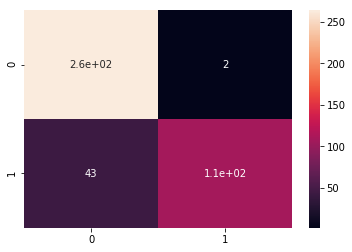

In [16]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)
plt.savefig("cmnn.png")
files.download("cmnn.png")

In [0]:
#After feature engineering with alone or with family

In [0]:
train['Alone'] = train.SibSp + train.Parch
test['Alone'] =  test.SibSp + test.Parch

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [19]:
train['Alone'].loc[train['Alone']>0] = 1
train['Alone'].loc[train['Alone']==0] = 0
test['Alone'].loc[test['Alone']>0] = 1
test['Alone'].loc[test['Alone']==0] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [21]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [0]:
X = train.iloc[:, [2,4,5,12]].values
X_test = test.iloc[:, [1,3,4,11]].values

y = train.iloc[:, 1].values
y_test=gs.iloc[:, [1]].values

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 1] = labelencoder.fit_transform(X[:, 1])
labelencoder1 = LabelEncoder()
X_test[:, 1] = labelencoder1.fit_transform(X_test[:, 1])

In [24]:
classifier = Sequential()
#Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6,init = 'uniform', activation = 'relu',input_dim = 4)) 
classifier.add(Dense(output_dim = 6,init = 'uniform', activation = 'relu')) 
#classifier.add(Dense(output_dim = 6,init = 'uniform', activation = 'relu'))
#Addind the output layer
classifier.add(Dense(output_dim = 1,init = 'uniform', activation = 'sigmoid')) 
#Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
classifier.fit(X,y,batch_size = 10,epochs = 100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=4, units=6, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  import sys


Epoch 1/100
891/891 [==============================] - 0s 449us/step - loss: 0.6884 - acc: 0.6117
Epoch 2/100
891/891 [==============================] - 0s 107us/step - loss: 0.6742 - acc: 0.6162
Epoch 3/100
891/891 [==============================] - 0s 110us/step - loss: 0.6634 - acc: 0.6162
Epoch 4/100
891/891 [==============================] - 0s 128us/step - loss: 0.6550 - acc: 0.6162
Epoch 5/100
891/891 [==============================] - 0s 128us/step - loss: 0.6406 - acc: 0.6162
Epoch 6/100
891/891 [==============================] - 0s 127us/step - loss: 0.6194 - acc: 0.6296
Epoch 7/100
891/891 [==============================] - 0s 114us/step - loss: 0.5957 - acc: 0.6835
Epoch 8/100
891/891 [==============================] - 0s 135us/step - loss: 0.5663 - acc: 0.7205
Epoch 9/100
891/891 [==============================] - 0s 123us/step - loss: 0.5485 - acc: 0.7396
Epoch 10/100
891/891 [==============================] - 0s 112us/step - loss: 0.5372 - acc: 0.7452
Epoch 11/100
891/89

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
y_pred = (y_pred>0.5)

In [27]:
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[265,   1],
       [ 33, 119]])

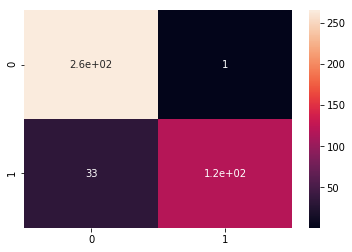

In [29]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)
plt.savefig("cmnn1.png")
files.download("cmnn1.png")